### 5.3 Assignment: Create Optimal Hotel Recommendations

All online travel agencies are scrambling to meet the Artificial Intelligence driven personalization standard set by Amazon and Netflix. In addition, the world of online travel has become a highly competitive space where brands try to capture our attention (and wallet) with recommending, comparing, matching, and sharing. For this assignment, we aim to create the optimal hotel recommendations for Expedia’s users that are searching for a hotel to book. For this assignment, you need to predict which “hotel cluster” the user is likely to book, given his (or her) search details. In doing so, you should be able to demonstrate your ability to use four different algorithms (of your choice). The data set can be found at Kaggle: Expedia Hotel Recommendations. To get you started, I would suggest you use train.csv which captured the logs of user behavior and destinations.csv which contains information related to hotel reviews made by users. You are also required to write a one page summary of your approach in getting to your prediction methods. I expect you to use a combination of R and Python in your answer.

https://www.kaggle.com/c/expedia-hotel-recommendations/data?select=train.csv

https://www.kaggle.com/c/expedia-hotel-recommendations/data?select=destinations.csv

https://pandas-profiling.github.io/pandas-profiling/docs/master/index.html

#pip install github.com/pandas-profiling/pandas-profiling/archive/master.zip


### File descriptions - data set can be found at Kaggle:

1. destinations.csv - contains information related to hotel reviews made by users(hotel search latent attributes)
2. train.csv - the training set- captured the logs of user behavior 
3. test.csv - the test set
4. sample_submission.csv - a sample submission file in the correct format

### The approach

The given problem is interpreted as a 100 class classification problem, where the classes are the hotel clusters.

### Load libraries

In [226]:
# Standard libraryimport-Python program to plot a complex bar chart  
import pandas as pd 
import numpy as np
import pandas_profiling as pp
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics

# Use to configure display of graph
%matplotlib inline 

#stop unnecessary warnings from printing to the screen
warnings.simplefilter('ignore')

# third party imports
from datetime import datetime
from sklearn import svm
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

### 1.  Import  dataset : destinations.csv - hotel search latent attributes

In [227]:
import pandas as pd
#The following command imports the CSV dataset using pandas:
test = pd.read_csv("test.csv", nrows =10000)

destination = pd.read_csv("destinations.csv", nrows =10000)
df = pd.read_csv("destinations.csv", nrows =10000)
df.head() 

,srch_destination_id,d1,d2,d3,d4,d5,d6,d7,d8,d9,...,d140,d141,d142,d143,d144,d145,d146,d147,d148,d149
0,0,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657,-1.897627,-2.198657,-2.198657,-1.897627,...,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657
1,1,-2.181690,-2.181690,-2.181690,-2.082564,-2.181690,-2.165028,-2.181690,-2.181690,-2.031597,...,-2.165028,-2.181690,-2.165028,-2.181690,-2.181690,-2.165028,-2.181690,-2.181690,-2.181690,-2.181690
2,2,-2.183490,-2.224164,-2.224164,-2.189562,-2.105819,-2.075407,-2.224164,-2.118483,-2.140393,...,-2.224164,-2.224164,-2.196379,-2.224164,-2.192009,-2.224164,-2.224164,-2.224164,-2.224164,-2.057548
3,3,-2.177409,-2.177409,-2.177409,-2.177409,-2.177409,-2.115485,-2.177409,-2.177409,-2.177409,...,-2.161081,-2.177409,-2.177409,-2.177409,-2.177409,-2.177409,-2.177409,-2.177409,-2.177409,-2.177409
4,4,-2.189562,-2.187783,-2.194008,-2.171153,-2.152303,-2.056618,-2.194008,-2.194008,-2.145911,...,-2.187356,-2.194008,-2.191779,-2.194008,-2.194008,-2.185161,-2.194008,-2.194008,-2.194008,-2.188037


In [228]:
# Showing the statistical details of the dataset
df.describe()

,srch_destination_id,d1,d2,d3,d4,d5,d6,d7,d8,d9,...,d140,d141,d142,d143,d144,d145,d146,d147,d148,d149
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5126.342700,-2.185688,-2.196879,-2.201013,-2.187428,-2.150445,-2.083379,-2.197001,-2.197264,-2.119438,...,-2.199784,-2.186854,-2.196236,-2.197772,-2.189854,-2.199422,-2.195256,-2.202158,-2.201880,-2.191511
std,2963.231721,0.035098,0.034648,0.032592,0.039848,0.068166,0.111477,0.033512,0.032764,0.170400,...,0.029505,0.050570,0.039497,0.033872,0.039065,0.030459,0.045737,0.030618,0.030526,0.038893
min,0.000000,-2.376577,-2.454624,-2.454624,-2.454624,-2.454624,-2.344165,-2.454624,-2.454624,-2.376577,...,-2.426125,-2.454624,-2.454624,-2.440107,-2.454624,-2.426125,-2.454624,-2.454624,-2.454624,-2.454624
25%,2576.750000,-2.200926,-2.212192,-2.216285,-2.204907,-2.186731,-2.163875,-2.211987,-2.212163,-2.191913,...,-2.214207,-2.205536,-2.211689,-2.213140,-2.205800,-2.215074,-2.212077,-2.216883,-2.216439,-2.207482
50%,5101.500000,-2.182481,-2.189541,-2.192493,-2.184689,-2.176371,-2.121796,-2.189021,-2.189218,-2.176881,...,-2.191305,-2.184773,-2.188889,-2.190416,-2.185155,-2.191353,-2.189595,-2.193526,-2.193105,-2.186003
75%,7686.250000,-2.174647,-2.177883,-2.178964,-2.175670,-2.120533,-2.036471,-2.177730,-2.177755,-2.137957,...,-2.178139,-2.175747,-2.177680,-2.178174,-2.176011,-2.177927,-2.177703,-2.179464,-2.179312,-2.176415
max,10326.000000,-1.851415,-1.586439,-1.965178,-1.936663,-1.726651,-1.209058,-1.720070,-1.879678,-1.028502,...,-1.913814,-0.987334,-1.382385,-1.775218,-1.828735,-1.838849,-1.408689,-1.942067,-1.994061,-1.717832


### Data Exploration - EDA ( Exploratory Data Analysis)

In [229]:
# Data Exploration, shows the correlations

df_correlation = df.corr()

df_correlation

,srch_destination_id,d1,d2,d3,d4,d5,d6,d7,d8,d9,...,d140,d141,d142,d143,d144,d145,d146,d147,d148,d149
srch_destination_id,1.000000,0.023452,0.056412,0.046895,-0.025826,-0.108487,-0.079539,0.040099,0.061330,0.001007,...,0.075543,0.007303,0.053665,0.068324,0.031330,0.072233,0.064384,0.085488,0.094296,0.021082
d1,0.023452,1.000000,0.245350,0.339934,0.123480,-0.024022,-0.394337,0.244634,0.276315,-0.091256,...,0.386723,0.254219,0.298462,0.350614,0.366729,0.391173,0.227590,0.378712,0.431959,0.223985
d2,0.056412,0.245350,1.000000,0.561313,0.307271,-0.067935,-0.466595,0.524542,0.517061,-0.256479,...,0.573922,0.187761,0.419645,0.531607,0.365113,0.548796,0.323933,0.591859,0.591054,0.424194
d3,0.046895,0.339934,0.561313,1.000000,0.342952,-0.209527,-0.564215,0.607864,0.632385,-0.354626,...,0.812518,0.249292,0.526792,0.593746,0.427997,0.781456,0.451202,0.831343,0.825003,0.460593
d4,-0.025826,0.123480,0.307271,0.342952,1.000000,0.264402,-0.275328,0.330128,0.335002,-0.273355,...,0.274738,0.097304,0.220406,0.204212,0.216866,0.250476,0.184501,0.319789,0.310443,0.304064
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
d145,0.072233,0.391173,0.548796,0.781456,0.250476,-0.333771,-0.539632,0.577615,0.612988,-0.195059,...,0.904504,0.222932,0.519398,0.641595,0.387807,1.000000,0.451301,0.836132,0.829137,0.400698
d146,0.064384,0.227590,0.323933,0.451202,0.184501,-0.094769,-0.401163,0.357104,0.367892,-0.255916,...,0.463584,0.209860,0.305198,0.362006,0.285435,0.451301,1.000000,0.492775,0.484072,0.247309
d147,0.085488,0.378712,0.591859,0.831343,0.319789,-0.277476,-0.603220,0.647840,0.682219,-0.354815,...,0.866587,0.276469,0.557257,0.657279,0.448173,0.836132,0.492775,1.000000,0.887792,0.466562
d148,0.094296,0.431959,0.591054,0.825003,0.310443,-0.280455,-0.616597,0.637277,0.669848,-0.357010,...,0.866090,0.296012,0.570078,0.642381,0.473747,0.829137,0.484072,0.887792,1.000000,0.461923


In [230]:
#Let’s explore the data a little bit by checking the number of rows and columns in our datasets.
df.shape

(10000, 150)

In [231]:
# display information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Columns: 150 entries, srch_destination_id to d149
dtypes: float64(149), int64(1)
memory usage: 11.4 MB


In [232]:
#show columns
df.columns

Index(['srch_destination_id', 'd1', 'd2', 'd3', 'd4', 'd5', 'd6', 'd7', 'd8',
       'd9',
       ...
       'd140', 'd141', 'd142', 'd143', 'd144', 'd145', 'd146', 'd147', 'd148',
       'd149'],
      dtype='object', length=150)

In [233]:
# How to identify the null value NaN where the value is equal to 0

#df.notnull().head()
df.notnull().sum()

srch_destination_id    10000
d1                     10000
d2                     10000
d3                     10000
d4                     10000
                       ...  
d145                   10000
d146                   10000
d147                   10000
d148                   10000
d149                   10000
Length: 150, dtype: int64

The above line shows that there is no missing or null values

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000026807682A48>]],
      dtype=object)

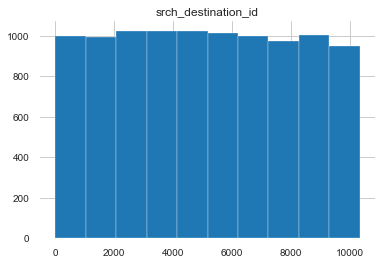

In [234]:
# Histogram of the destinations file
df.hist('srch_destination_id')

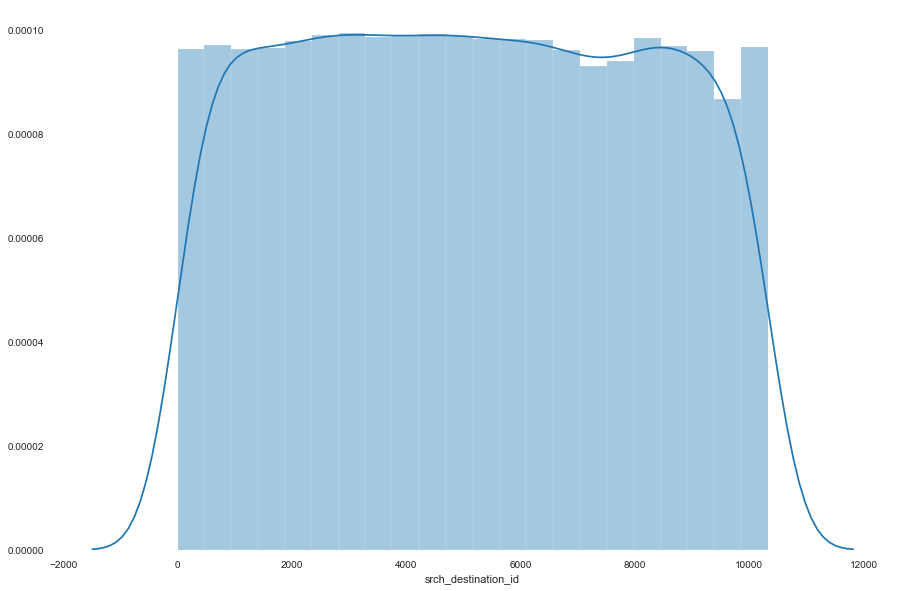

In [235]:
import seaborn as seabornInstance 
plt.figure(figsize=(15,10))
plt.tight_layout()
seabornInstance.distplot(df['srch_destination_id'])

In [236]:

#https://www.bing.com/videos/search?q=how+to+install+pandas_profiling+in+windows+10&docid=608012226248246912&mid=834EC20978002515E129834EC20978002515E129&view=detail&FORM=VIRE

#pip install pandas-profiling  

# pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip



In [237]:
#pip install pandas-profiling
import pandas as pd
import numpy as np
import pandas_profiling as pp
from pandas_profiling import ProfileReport
#df = pd.read_csv("destinations.csv", nrows= 10)
#df.head()

In [238]:
#To generate the report
#profile = ProfileReport(df, title="Pandas Profiling Report")
#profile 

In [239]:
# EDA of the train dataset
#profile = ProfileReport(df, title='Pandas Profiling Report', explorative=True)

In [240]:
##This is achieved by simply displaying the report
#profile.to_widgets()

### 2.  Import  dataset :  train.csv - the training set

In [241]:
import pandas as pd
#The following command imports the CSV dataset using pandas:

train = pd.read_csv("train.csv", nrows= 10000)
train.head() 

,date_time,site_name,posa_continent,user_location_country,user_location_region,user_location_city,orig_destination_distance,user_id,is_mobile,is_package,...,srch_children_cnt,srch_rm_cnt,srch_destination_id,srch_destination_type_id,is_booking,cnt,hotel_continent,hotel_country,hotel_market,hotel_cluster
0,2014-08-11 07:46:59,2,3,66,348,48862,2234.2641,12,0,1,...,0,1,8250,1,0,3,2,50,628,1
1,2014-08-11 08:22:12,2,3,66,348,48862,2234.2641,12,0,1,...,0,1,8250,1,1,1,2,50,628,1
2,2014-08-11 08:24:33,2,3,66,348,48862,2234.2641,12,0,0,...,0,1,8250,1,0,1,2,50,628,1
3,2014-08-09 18:05:16,2,3,66,442,35390,913.1932,93,0,0,...,0,1,14984,1,0,1,2,50,1457,80
4,2014-08-09 18:08:18,2,3,66,442,35390,913.6259,93,0,0,...,0,1,14984,1,0,1,2,50,1457,21


### Exploratory Data Analysis (EDA)

In [242]:
#pip install pandas-profiling
import pandas as pd
import numpy as np
import pandas_profiling as pp
from pandas_profiling import ProfileReport

#load 10 rows of the dataset
train = pd.read_csv("train.csv", nrows= 1000)
train.head()

,date_time,site_name,posa_continent,user_location_country,user_location_region,user_location_city,orig_destination_distance,user_id,is_mobile,is_package,...,srch_children_cnt,srch_rm_cnt,srch_destination_id,srch_destination_type_id,is_booking,cnt,hotel_continent,hotel_country,hotel_market,hotel_cluster
0,2014-08-11 07:46:59,2,3,66,348,48862,2234.2641,12,0,1,...,0,1,8250,1,0,3,2,50,628,1
1,2014-08-11 08:22:12,2,3,66,348,48862,2234.2641,12,0,1,...,0,1,8250,1,1,1,2,50,628,1
2,2014-08-11 08:24:33,2,3,66,348,48862,2234.2641,12,0,0,...,0,1,8250,1,0,1,2,50,628,1
3,2014-08-09 18:05:16,2,3,66,442,35390,913.1932,93,0,0,...,0,1,14984,1,0,1,2,50,1457,80
4,2014-08-09 18:08:18,2,3,66,442,35390,913.6259,93,0,0,...,0,1,14984,1,0,1,2,50,1457,21


In [243]:
#To generate the report
profile = ProfileReport(train, title="Pandas Profiling Report")
#profile 

In [244]:
# EDA of the train dataset
#pp.ProfileReport(train)
profile = ProfileReport(train, title='Pandas Profiling Report', explorative=True)

In [281]:
#This is achieved by simply displaying the report
#profile.to_widgets()

In [246]:
profile = train.profile_report(title='Pandas Profiling Report', plot={'histogram': {'bins': 8}})
profile.to_file("output.html")

In [247]:
# generate a HTML report file, save the ProfileReport to an object
profile.to_file("your_report.html")

### Data Exploration

In [248]:
# to drop column that contains missing or null values
clean_train = train.dropna(axis='columns')
clean_train.head() 

,date_time,site_name,posa_continent,user_location_country,user_location_region,user_location_city,user_id,is_mobile,is_package,channel,...,srch_children_cnt,srch_rm_cnt,srch_destination_id,srch_destination_type_id,is_booking,cnt,hotel_continent,hotel_country,hotel_market,hotel_cluster
0,2014-08-11 07:46:59,2,3,66,348,48862,12,0,1,9,...,0,1,8250,1,0,3,2,50,628,1
1,2014-08-11 08:22:12,2,3,66,348,48862,12,0,1,9,...,0,1,8250,1,1,1,2,50,628,1
2,2014-08-11 08:24:33,2,3,66,348,48862,12,0,0,9,...,0,1,8250,1,0,1,2,50,628,1
3,2014-08-09 18:05:16,2,3,66,442,35390,93,0,0,3,...,0,1,14984,1,0,1,2,50,1457,80
4,2014-08-09 18:08:18,2,3,66,442,35390,93,0,0,3,...,0,1,14984,1,0,1,2,50,1457,21


In [249]:
# Data Exploration, shows the correlations

train_correlation = train.corr()

#train_correlation

In [250]:
#Let’s explore the data a little bit by checking the number of rows and columns in our datasets.
train.shape

(1000, 24)

In [251]:
# Showing the statistical details of the dataset
train.describe()

,site_name,posa_continent,user_location_country,user_location_region,user_location_city,orig_destination_distance,user_id,is_mobile,is_package,channel,...,srch_children_cnt,srch_rm_cnt,srch_destination_id,srch_destination_type_id,is_booking,cnt,hotel_continent,hotel_country,hotel_market,hotel_cluster
count,1000.00000,1000.00000,1000.000000,1000.000000,1000.000000,268.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,19.36100,2.16700,50.865000,193.805000,19680.638000,1860.755094,3596.333000,0.343000,0.140000,4.850000,...,0.353000,1.110000,15154.889000,2.677000,0.064000,1.395000,3.49400,87.145000,406.705000,48.255000
std,10.30577,0.74274,56.595334,243.919765,16541.209223,2271.610410,1499.094642,0.474949,0.347161,3.533835,...,0.555608,0.440561,11817.903568,2.296071,0.244875,1.159448,1.82189,50.001001,404.375879,29.048128
min,2.00000,0.00000,3.000000,12.000000,1493.000000,3.337900,12.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,267.000000,1.000000,0.000000,1.000000,0.00000,0.000000,2.000000,0.000000
25%,13.00000,2.00000,23.000000,48.000000,4924.000000,177.330075,2451.000000,0.000000,0.000000,1.000000,...,0.000000,1.000000,8278.000000,1.000000,0.000000,1.000000,2.00000,50.000000,35.000000,24.000000
50%,24.00000,2.00000,23.000000,64.000000,10067.000000,766.156100,3972.000000,0.000000,0.000000,4.000000,...,0.000000,1.000000,8811.000000,1.000000,0.000000,1.000000,2.00000,50.000000,366.000000,43.000000
75%,25.00000,3.00000,66.000000,189.000000,40365.000000,2454.858800,4539.000000,1.000000,0.000000,9.000000,...,1.000000,1.000000,18489.000000,6.000000,0.000000,1.000000,6.00000,105.000000,628.000000,72.000000
max,37.00000,4.00000,205.000000,991.000000,56440.000000,8457.263600,6450.000000,1.000000,1.000000,9.000000,...,3.000000,5.000000,65035.000000,8.000000,1.000000,23.000000,6.00000,208.000000,1926.000000,99.000000


In [252]:
#train.info()

In [253]:
#show columns
train.columns

Index(['date_time', 'site_name', 'posa_continent', 'user_location_country',
       'user_location_region', 'user_location_city',
       'orig_destination_distance', 'user_id', 'is_mobile', 'is_package',
       'channel', 'srch_ci', 'srch_co', 'srch_adults_cnt', 'srch_children_cnt',
       'srch_rm_cnt', 'srch_destination_id', 'srch_destination_type_id',
       'is_booking', 'cnt', 'hotel_continent', 'hotel_country', 'hotel_market',
       'hotel_cluster'],
      dtype='object')

In [254]:
# How to identify the null value NaN where the value is equal to 0

#df.notnull().head()
train.notnull().sum()

date_time                    1000
site_name                    1000
posa_continent               1000
user_location_country        1000
user_location_region         1000
user_location_city           1000
orig_destination_distance     268
user_id                      1000
is_mobile                    1000
is_package                   1000
channel                      1000
srch_ci                      1000
srch_co                      1000
srch_adults_cnt              1000
srch_children_cnt            1000
srch_rm_cnt                  1000
srch_destination_id          1000
srch_destination_type_id     1000
is_booking                   1000
cnt                          1000
hotel_continent              1000
hotel_country                1000
hotel_market                 1000
hotel_cluster                1000
dtype: int64

In [255]:
# to drop column that contains missing or null values
clean_train = train.dropna(axis='columns')
clean_train.head() 

,date_time,site_name,posa_continent,user_location_country,user_location_region,user_location_city,user_id,is_mobile,is_package,channel,...,srch_children_cnt,srch_rm_cnt,srch_destination_id,srch_destination_type_id,is_booking,cnt,hotel_continent,hotel_country,hotel_market,hotel_cluster
0,2014-08-11 07:46:59,2,3,66,348,48862,12,0,1,9,...,0,1,8250,1,0,3,2,50,628,1
1,2014-08-11 08:22:12,2,3,66,348,48862,12,0,1,9,...,0,1,8250,1,1,1,2,50,628,1
2,2014-08-11 08:24:33,2,3,66,348,48862,12,0,0,9,...,0,1,8250,1,0,1,2,50,628,1
3,2014-08-09 18:05:16,2,3,66,442,35390,93,0,0,3,...,0,1,14984,1,0,1,2,50,1457,80
4,2014-08-09 18:08:18,2,3,66,442,35390,93,0,0,3,...,0,1,14984,1,0,1,2,50,1457,21


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000267BF9D4D48>]],
      dtype=object)

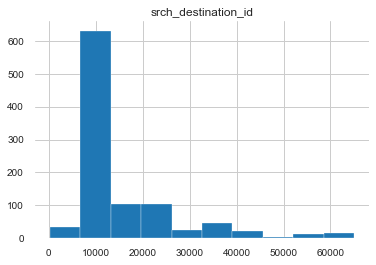

In [256]:
# Histogram of the train dataset 
train.hist('srch_destination_id')

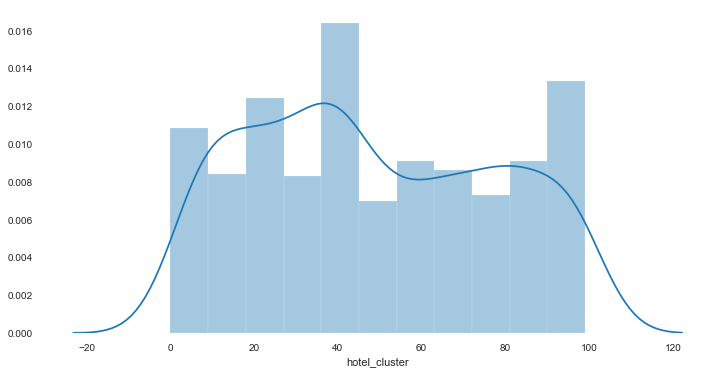

In [257]:
import matplotlib.pyplot as plt
import seaborn as sns
# histogram of clusters
plt.figure(figsize=(12, 6))
sns.distplot(train['hotel_cluster'])

### The above histogram of hotel clusters display that the data is distributed over all 100 clusters. 

In [258]:
#import seaborn as seabornInstance 
#plt.figure(figsize=(15,10))
#plt.tight_layout()
#seabornInstance.distplot(train['srch_destination_type_id'])

### Feature Engineering

In the train dataset, date columns can not be used directly in the model. Therefore it is necessary to extract year and month from them.

* **date_time** - Timestamp
* **srch_ci** - Checkin date
* **srch_co** - Checkout date

In [259]:
train.head()

,date_time,site_name,posa_continent,user_location_country,user_location_region,user_location_city,orig_destination_distance,user_id,is_mobile,is_package,...,srch_children_cnt,srch_rm_cnt,srch_destination_id,srch_destination_type_id,is_booking,cnt,hotel_continent,hotel_country,hotel_market,hotel_cluster
0,2014-08-11 07:46:59,2,3,66,348,48862,2234.2641,12,0,1,...,0,1,8250,1,0,3,2,50,628,1
1,2014-08-11 08:22:12,2,3,66,348,48862,2234.2641,12,0,1,...,0,1,8250,1,1,1,2,50,628,1
2,2014-08-11 08:24:33,2,3,66,348,48862,2234.2641,12,0,0,...,0,1,8250,1,0,1,2,50,628,1
3,2014-08-09 18:05:16,2,3,66,442,35390,913.1932,93,0,0,...,0,1,14984,1,0,1,2,50,1457,80
4,2014-08-09 18:08:18,2,3,66,442,35390,913.6259,93,0,0,...,0,1,14984,1,0,1,2,50,1457,21


In [260]:
train.columns

Index(['date_time', 'site_name', 'posa_continent', 'user_location_country',
       'user_location_region', 'user_location_city',
       'orig_destination_distance', 'user_id', 'is_mobile', 'is_package',
       'channel', 'srch_ci', 'srch_co', 'srch_adults_cnt', 'srch_children_cnt',
       'srch_rm_cnt', 'srch_destination_id', 'srch_destination_type_id',
       'is_booking', 'cnt', 'hotel_continent', 'hotel_country', 'hotel_market',
       'hotel_cluster'],
      dtype='object')

In [261]:
# get year part from a date

def get_year(x):
    '''
    Args:
        datetime
    Returns:
        year as numeric
    '''
    if x is not None and type(x) is not float:
        try:
            return datetime.strptime(x, '%Y-%m-%d').year
        except ValueError:
            return datetime.strptime(x, '%Y-%m-%d %H:%M:%S').year
    else:
        return 2013
    pass

# get month part from a date

def get_month(x):
    '''
    Args:
        datetime
    Returns:
        month as numeric
    '''    
    if x is not None and type(x) is not float:
        try:
            return datetime.strptime(x, '%Y-%m-%d').month
        except:
            return datetime.strptime(x, '%Y-%m-%d %H:%M:%S').month
    else:
        return 1
    pass

# extract year and month from date time column
train['date_time_year'] = pd.Series(train.date_time, index = train.index)
train['date_time_month'] = pd.Series(train.date_time, index = train.index)

train.date_time_year = train.date_time_year.apply(lambda x: get_year(x))
train.date_time_month = train.date_time_month.apply(lambda x: get_month(x))
del train['date_time']

# extract year and month from check in date column
train['srch_ci_year'] = pd.Series(train.srch_ci, index = train.index)
train['srch_ci_month'] = pd.Series(train.srch_ci, index = train.index)

train.srch_ci_year = train.srch_ci_year.apply(lambda x: get_year(x))
train.srch_ci_month = train.srch_ci_month.apply(lambda x: get_month(x))
del train['srch_ci']

# extract year and month from check out date column
train['srch_co_year'] = pd.Series(train.srch_co, index = train.index)
train['srch_co_month'] = pd.Series(train.srch_co, index = train.index)

train.srch_co_year = train.srch_co_year.apply(lambda x: get_year(x))
train.srch_co_month = train.srch_co_month.apply(lambda x: get_month(x))
del train['srch_co']

# check the transformed data
train.head()

,site_name,posa_continent,user_location_country,user_location_region,user_location_city,orig_destination_distance,user_id,is_mobile,is_package,channel,...,hotel_continent,hotel_country,hotel_market,hotel_cluster,date_time_year,date_time_month,srch_ci_year,srch_ci_month,srch_co_year,srch_co_month
0,2,3,66,348,48862,2234.2641,12,0,1,9,...,2,50,628,1,2014,8,2014,8,2014,8
1,2,3,66,348,48862,2234.2641,12,0,1,9,...,2,50,628,1,2014,8,2014,8,2014,9
2,2,3,66,348,48862,2234.2641,12,0,0,9,...,2,50,628,1,2014,8,2014,8,2014,9
3,2,3,66,442,35390,913.1932,93,0,0,3,...,2,50,1457,80,2014,8,2014,11,2014,11
4,2,3,66,442,35390,913.6259,93,0,0,3,...,2,50,1457,21,2014,8,2014,11,2014,11


### The correlation of the entire dataset -train.csv

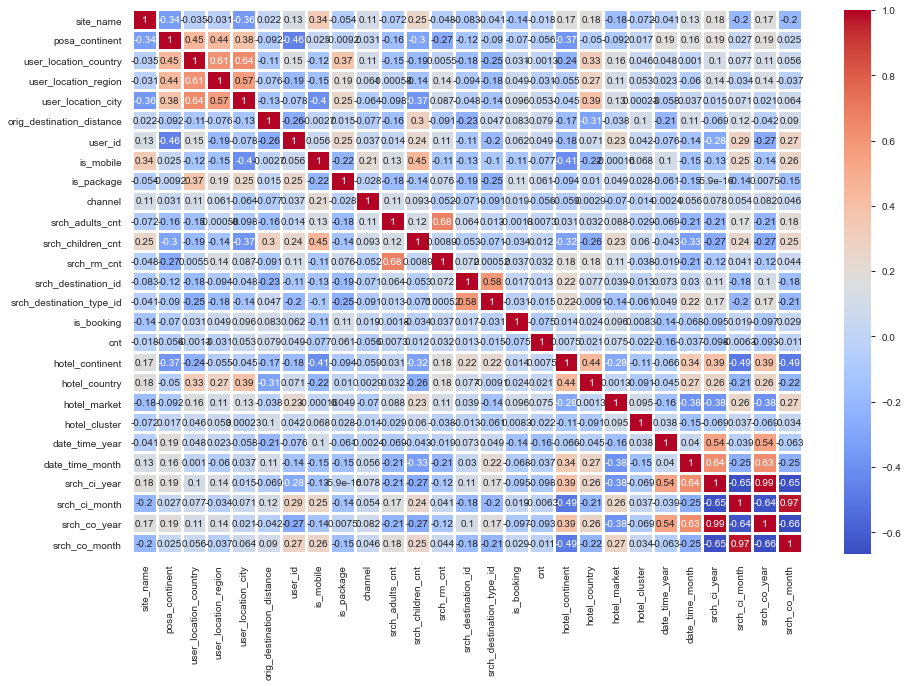

In [262]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 10)
sns.heatmap(train.corr(),cmap='coolwarm',ax=ax,annot=True,linewidths=2)

###  The above graph  show the correlation between others variables with the hotel cluster 

In [263]:
# correlation with others
train.corr()["hotel_cluster"].sort_values()

date_time_month             -0.151771
hotel_continent             -0.108342
hotel_country               -0.091295
site_name                   -0.072002
srch_ci_year                -0.068858
srch_co_year                -0.068650
srch_destination_type_id    -0.061288
srch_rm_cnt                 -0.037784
srch_adults_cnt             -0.028777
cnt                         -0.021956
channel                     -0.013903
srch_destination_id         -0.013032
user_location_city           0.000234
is_booking                   0.008258
posa_continent               0.017371
is_package                   0.028220
srch_co_month                0.034409
srch_ci_month                0.037463
date_time_year               0.037519
user_id                      0.041986
user_location_country        0.045645
user_location_region         0.053300
srch_children_cnt            0.060347
is_mobile                    0.067806
hotel_market                 0.095300
orig_destination_distance    0.104659
hotel_cluste

The relationship( linear correlation) between the hotel cluster and other variables is not strong. The methods in which model linear relationship between features might not be suitable for the problem. The following factors will be impactful when it comes to clustering:

1. srch_destination_id - ID of the destination where the hotel search was performed
2. hotel_country - Country where the hotel is located
3. hotel_market - Hotel market
4. hotel_cluster - ID of a hotel cluster
5. is_package - Whether part of a package or not (1/0)
6. is_booking - Booking (1) or Click (0)

In [264]:
#There is an interest in booking events,so let us get rid of clicks.
train_book = train.loc[train['is_booking'] == 1]

### Create a pivot to map each cluster, and shape it accordingly so that it can be merged with the original data.

In [265]:
# step 1
factors = [train_book.groupby(['srch_destination_id','hotel_country','hotel_market','is_package','hotel_cluster'])['is_booking'].agg(['sum','count'])]
summ = pd.concat(factors).groupby(level=[0,1,2,3,4]).sum()
summ.dropna(inplace=True)
summ.head()

,,,,,sum,count
srch_destination_id,hotel_country,hotel_market,is_package,hotel_cluster,,
1385,185,185,1,58,1,1
1571,5,89,0,38,1,1
4777,50,967,0,42,2,2
5080,204,1762,0,61,1,1
8213,68,275,1,68,2,2


In [266]:
# step 2
summ['sum_and_cnt'] = 0.85*summ['sum'] + 0.15*summ['count']
summ = summ.groupby(level=[0,1,2,3]).apply(lambda x: x.astype(float)/x.sum())
summ.reset_index(inplace=True)
summ.head()

,srch_destination_id,hotel_country,hotel_market,is_package,hotel_cluster,sum,count,sum_and_cnt
0,1385,185,185,1,58,1.0,1.0,1.0
1,1571,5,89,0,38,1.0,1.0,1.0
2,4777,50,967,0,42,1.0,1.0,1.0
3,5080,204,1762,0,61,1.0,1.0,1.0
4,8213,68,275,1,68,1.0,1.0,1.0


In [267]:
# step 3
summ_pivot = summ.pivot_table(index=['srch_destination_id','hotel_country','hotel_market','is_package'], columns='hotel_cluster', values='sum_and_cnt').reset_index()
summ_pivot.head()

hotel_cluster,srch_destination_id,hotel_country,hotel_market,is_package,1,2,6,7,8,10,...,78,80,81,82,83,85,90,91,95,99
0,1385,185,185,1,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1571,5,89,0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4777,50,967,0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5080,204,1762,0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,8213,68,275,1,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [268]:
# check the destination data to determine the relationship with other data.
df = pd.read_csv("destinations.csv", nrows =100000)
df.head()

,srch_destination_id,d1,d2,d3,d4,d5,d6,d7,d8,d9,...,d140,d141,d142,d143,d144,d145,d146,d147,d148,d149
0,0,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657,-1.897627,-2.198657,-2.198657,-1.897627,...,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657
1,1,-2.181690,-2.181690,-2.181690,-2.082564,-2.181690,-2.165028,-2.181690,-2.181690,-2.031597,...,-2.165028,-2.181690,-2.165028,-2.181690,-2.181690,-2.165028,-2.181690,-2.181690,-2.181690,-2.181690
2,2,-2.183490,-2.224164,-2.224164,-2.189562,-2.105819,-2.075407,-2.224164,-2.118483,-2.140393,...,-2.224164,-2.224164,-2.196379,-2.224164,-2.192009,-2.224164,-2.224164,-2.224164,-2.224164,-2.057548
3,3,-2.177409,-2.177409,-2.177409,-2.177409,-2.177409,-2.115485,-2.177409,-2.177409,-2.177409,...,-2.161081,-2.177409,-2.177409,-2.177409,-2.177409,-2.177409,-2.177409,-2.177409,-2.177409,-2.177409
4,4,-2.189562,-2.187783,-2.194008,-2.171153,-2.152303,-2.056618,-2.194008,-2.194008,-2.145911,...,-2.187356,-2.194008,-2.191779,-2.194008,-2.194008,-2.185161,-2.194008,-2.194008,-2.194008,-2.188037


### Merge the filtered booking data, pivotted data and destination data to form a single wide dataset.

In [269]:
destination = pd.read_csv("destinations.csv", nrows=100000)

In [270]:
train_book = pd.merge(train_book, destination, how='left', on='srch_destination_id')
train_book = pd.merge(train_book, summ_pivot, how='left', on=['srch_destination_id','hotel_country','hotel_market','is_package'])
train_book.fillna(0, inplace=True)
train_book.shape

(64, 220)

In [271]:
print(train_book.head())

   site_name  posa_continent  user_location_country  user_location_region  \
0          2               3                     66                   348   
1          2               3                     66                   318   
2         30               4                    195                   548   
3         30               4                    195                   991   
4          2               3                     66                   462   

   user_location_city  orig_destination_distance  user_id  is_mobile  \
0               48862                  2234.2641       12          0   
1               52078                     0.0000      756          0   
2               56440                     0.0000     1048          0   
3               47725                     0.0000     1048          0   
4               41898                  2454.8588     1482          0   

   is_package  channel  ...   78   80   81   82   83   85   90   91   95   99  
0           1        9  

### Algorithms- separate the target variable and predicter variables.

In [272]:
X = train_book.drop(['user_id', 'hotel_cluster', 'is_booking'], axis=1)
y = train_book.hotel_cluster
X.shape, y.shape

((64, 217), (64,))

In [273]:
# Check if all of the 100 clusters are present in the training data.
y.nunique()

44

### 1. Support Vector Machine (SVM)

In [275]:
classifier = make_pipeline(preprocessing.StandardScaler(), svm.SVC(decision_function_shape='ovo'))
np.mean(cross_val_score(classifier, X, y, cv=4))

0.0625

### 2. Naive Bayes classifier

In [277]:
classifier = make_pipeline(preprocessing.StandardScaler(), GaussianNB(priors=None))
np.mean(cross_val_score(classifier, X, y, cv=4))

0.3125

### 3. Logistic Regression

In [278]:
classifier = make_pipeline(preprocessing.StandardScaler(), LogisticRegression(multi_class='ovr'))
np.mean(cross_val_score(classifier, X, y, cv=4))

0.390625

### 4. K-Nearest Neighbor classifier

In [279]:
classifier = make_pipeline(preprocessing.StandardScaler(), KNeighborsClassifier(n_neighbors=5))
np.mean(cross_val_score(classifier, X, y, cv=4, scoring='accuracy'))

0.109375

SVM performed the best. Yet, the cross validation score is only 0.44. Other algorithms performed worse than that. Further feature engineering and increasing the number of folds might help improving the score.
The one pager summary for this approach is included in this notebook to keep the method coherent. 

### Summary

After completing the Exploratory Data Analysis (EDA), we got the idea to select the following algorithms based on the understanding of the datasets. In the following you will find the selected algorithms:

First, the  Support Vector Machine (SVM) performs classification by finding the hyperplane that maximizes the margin between the two classes. The vectors (cases) that define the hyperplane are the support vectors.  SVM can do both classification and regression. The clusters are multi-level (100) and used non-linear SVM.  Non-linear SVM means that the boundary that the algorithm calculates doesn't have to be a straight line. The advantage is that we can capture much more complex relationships between the data points without having to perform difficult transformations. The downside is that the training time is much longer as it's much more computationally intensive. Using SVM, help to achieve the highest cross-validation score.

Second, using the Naive Bayes classifier, which assumes that the presence (or absence) of a feature of a class is unrelated to the presence (or absence) of any other feature, given the class variable. Naive Bayes uses a similar method to predict the probability of different classes based on various attributes. This algorithm is mostly used in text classification and with problems having multiple classes. But it has the worst performance of the four models. Therefore, this classifier is not recommended for the problem at hand.

Third, logistic regression is the appropriate regression analysis to conduct when the dependent variable is dichotomous (binary). It is used to describe data and to explain the relationship between one dependent binary variable and one or more nominal, ordinal, interval, or ratio-level independent variables. The hotel falls in a specific cluster (yes/no) based on the chosen features. Logistic Regression was close to the performance of SVM but slightly worse.

Fourth, the K nearest neighbors is a simple algorithm that stores all available cases and classifies new cases based on a similarity measure (e.g., distance functions). It has been used in statistical estimation and pattern recognition already at the beginning of the 1970s as a non-parametric technique. The idea of KNN is to teach the model which users (with other similar characteristics) chose which hotel cluster and predict future cluster assignment based on that learning.
KNN works by finding the distances between a query and all the examples in the data, selecting the specified number examples (K) closest to the query, then votes for the most frequent label (in the case of classification) or averages the labels (in the case of regression).

KNN performed very similar to Logistic Regression for the model in question.
